In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [22]:
df=pd.read_csv('chart.csv')
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# Checking Areas

In [23]:
df['Area'] = df['Area'].str.strip()  # Remove leading/trailing whitespaces
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')  # Convert to numeric type

df = df[df['Area'] <= 5000]  # Keep rows where Area is less than or equal to 5000



## Checking Addresses

In [24]:
df=df[df['Address'].notnull()]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [25]:
df.nunique()

Area          237
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         927
Price(USD)    925
dtype: int64

In [26]:
df['Parking']=df['Parking'].astype(int)
df['Warehouse']=df['Warehouse'].astype(int)
df['Elevator']=df['Elevator'].astype(int)
df['Area']=df['Area'].astype(int)
df['Price']=df['Price'].astype(int)
df['Price(USD)']=df['Price(USD)'].astype(int)
# index=np.arange(0,len(df))
# df.index=index
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1850000000,61666
1,60,1,1,1,1,Shahran,1850000000,61666
2,79,2,1,1,1,Pardis,550000000,18333
3,95,2,1,1,1,Shahrake Qods,902500000,30083
4,123,2,1,1,1,Shahrake Gharb,-2147483648,233333
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,-2147483648,116666
3475,83,2,1,1,1,Niavaran,-2147483648,226666
3476,75,2,0,0,0,Parand,365000000,12166
3477,105,2,1,1,1,Dorous,-2147483648,186666


## Making numical address

In [27]:

df=df.join(pd.get_dummies(df.Address).astype(int))
df=df.drop(['Address'],axis=1)
df

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,61666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,61666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,18333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,30083,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,-2147483648,233333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,-2147483648,116666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,-2147483648,226666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,12166,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,-2147483648,186666,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation

In [28]:
df.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
Area,1.000000,0.672955,0.197890,0.076161,0.051473,-0.355960,0.722611,0.021815,-0.011054,0.245936,...,-0.002935,-0.088450,-0.000746,-0.009298,-0.010019,0.014942,0.062787,0.113818,0.007022,0.001979
Room,0.672955,1.000000,0.274425,0.129649,0.180380,-0.415337,0.567872,0.024055,-0.018414,0.004695,...,0.009787,-0.098383,0.014254,-0.003150,-0.001818,0.069113,0.029710,0.090050,0.007568,-0.001818
Parking,0.197890,0.274425,1.000000,0.431925,0.430213,-0.348966,0.191221,0.034746,0.010215,-0.001649,...,-0.042200,0.048653,0.009685,0.012513,-0.040147,0.037034,-0.007130,0.037669,0.014450,0.007222
Warehouse,0.076161,0.129649,0.431925,1.000000,0.202708,-0.159694,0.109676,0.024958,0.007337,-0.012238,...,-0.026288,0.043084,-0.001214,0.008987,0.005187,0.032150,0.016425,0.027057,0.010379,0.005187
Elevator,0.051473,0.180380,0.430213,0.202708,1.000000,-0.301579,0.111745,0.033844,0.012509,-0.080359,...,0.015323,-0.028932,0.016806,0.015323,-0.032783,0.007289,0.001643,0.046130,0.017696,0.008844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yousef Abad,0.014942,0.069113,0.037034,0.032150,0.007289,-0.081801,0.021515,-0.008646,-0.002542,-0.004405,...,-0.003113,-0.022105,-0.005969,-0.003113,-0.001797,1.000000,-0.005690,-0.009373,-0.003596,-0.001797
Zafar,0.062787,0.029710,-0.007130,0.016425,0.001643,-0.030813,0.051754,-0.004417,-0.001299,-0.002250,...,-0.001591,-0.011293,-0.003049,-0.001591,-0.000918,-0.005690,1.000000,-0.004788,-0.001837,-0.000918
Zaferanieh,0.113818,0.090050,0.037669,0.027057,0.046130,-0.068842,0.198944,-0.007276,-0.002139,-0.003707,...,-0.002620,-0.018603,-0.005023,-0.002620,-0.001512,-0.009373,-0.004788,1.000000,-0.003026,-0.001512
Zargandeh,0.007022,0.007568,0.014450,0.010379,0.017696,-0.026409,0.007097,-0.002791,-0.000821,-0.001422,...,-0.001005,-0.007136,-0.001927,-0.001005,-0.000580,-0.003596,-0.001837,-0.003026,1.000000,-0.000580


In [29]:
corr_matrix = df.corr()
columns_to_drop = []
for column in corr_matrix.columns:
    if abs(corr_matrix['Price(USD)'][column]) < 0.10:
        columns_to_drop.append(column)
df = df.drop(columns_to_drop, axis=1)
df

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Aqdasieh,Dorous,Elahieh,...,Gheitarieh,Kamranieh,Lavasan,Mahmoudieh,Niavaran,Parand,Pardis,Shahrake Gharb,Velenjak,Zaferanieh
0,63,1,1,1,1,1850000000,61666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,61666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,18333,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,95,2,1,1,1,902500000,30083,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,-2147483648,233333,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,-2147483648,116666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,-2147483648,226666,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3476,75,2,0,0,0,365000000,12166,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3477,105,2,1,1,1,-2147483648,186666,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<div style="text-align: right">در اینجا جدول کورلیشن را نمایش میدهیم تا ارتباط بین ستون ها را برای قمت به دلار پیدا کنیم .مشخص می شود که بیشترین ارتباط را مساحت و تعداد اتاق دارند.اما در ادامه ستون هایی را که ارتباط بسیار کمی یا به عبارتی کورلیشن کمتر از یک دهم با ستون قیمت دلار دارند را از دیتافریم اصلی حذف کرده تا سپس به سراغ محاسبات رگرسیون برویم </div>

## Plots

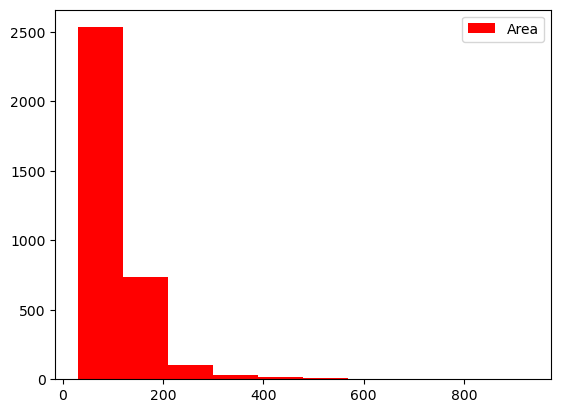

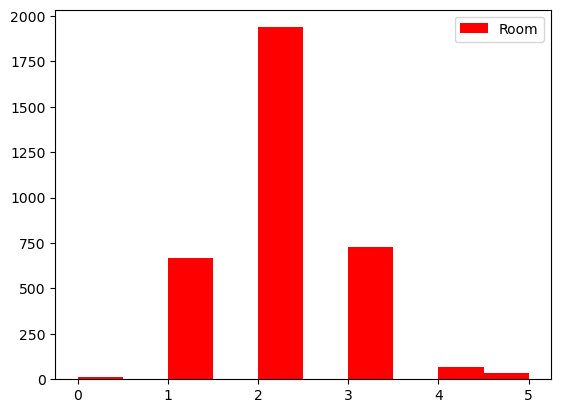

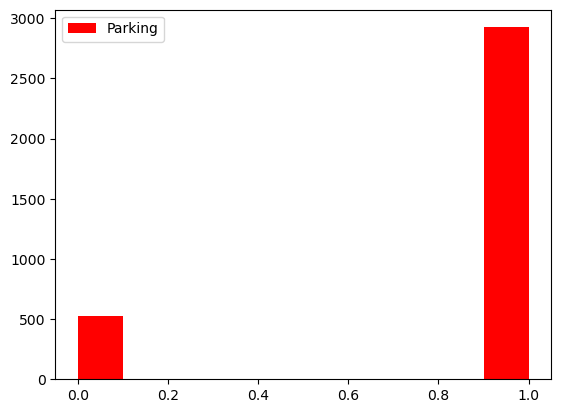

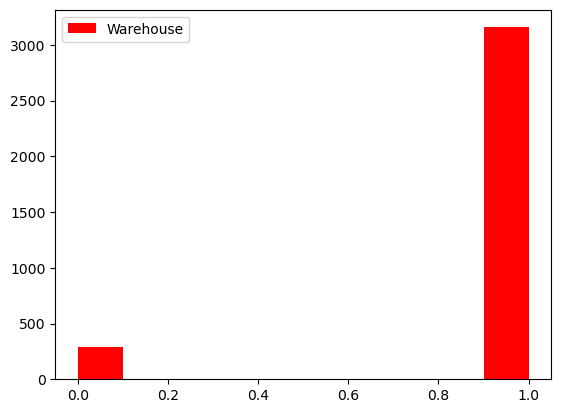

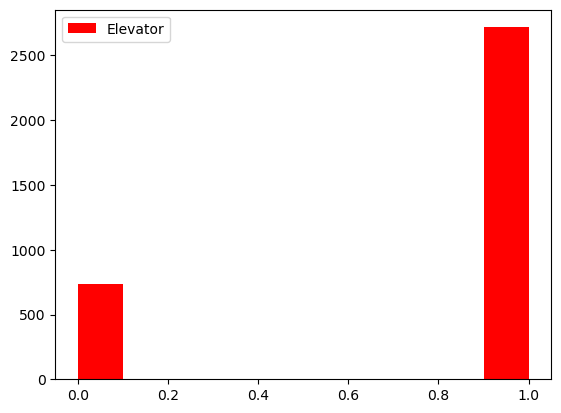

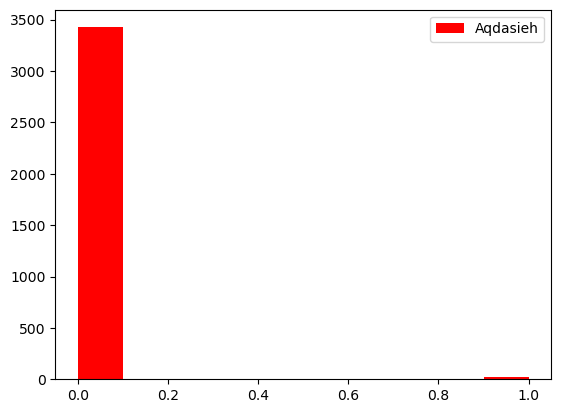

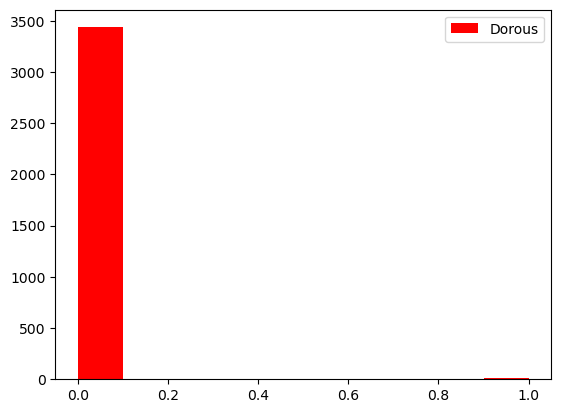

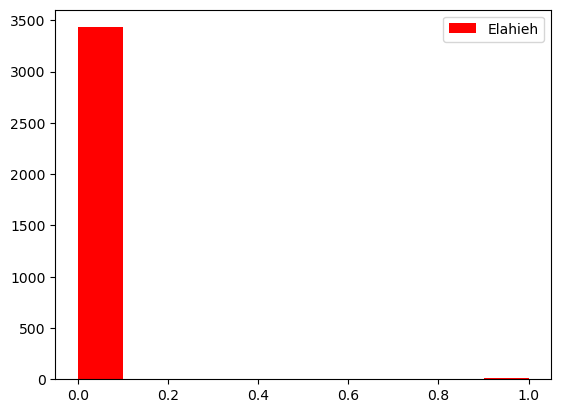

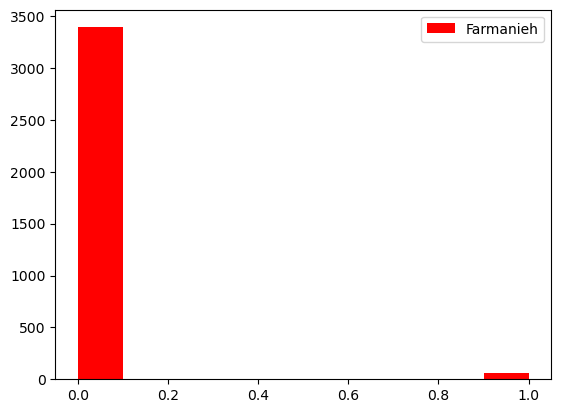

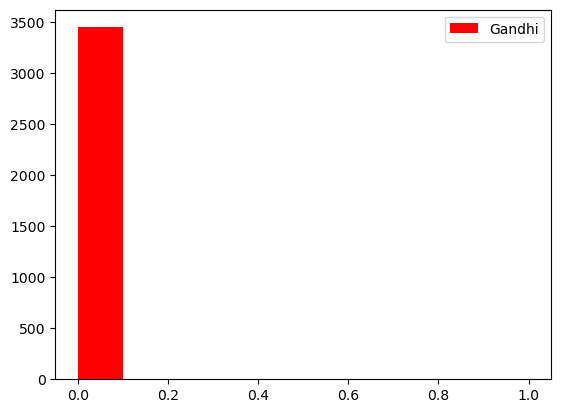

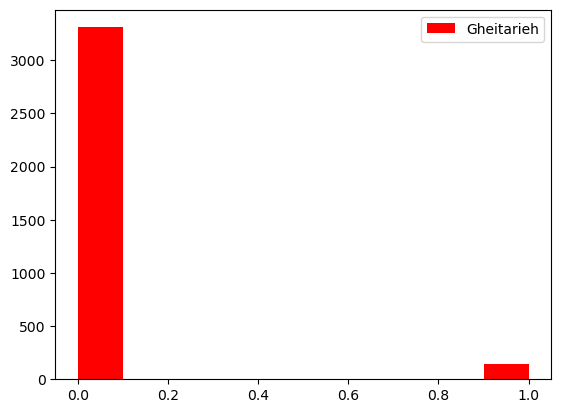

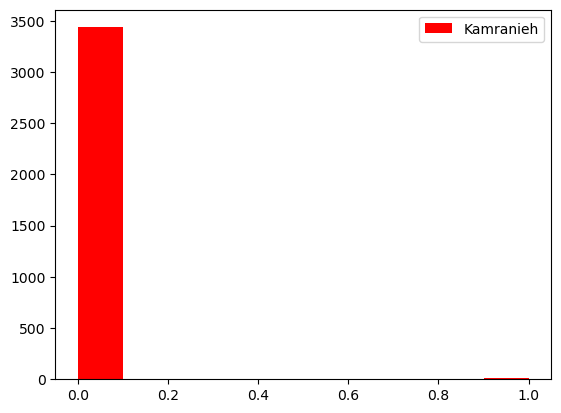

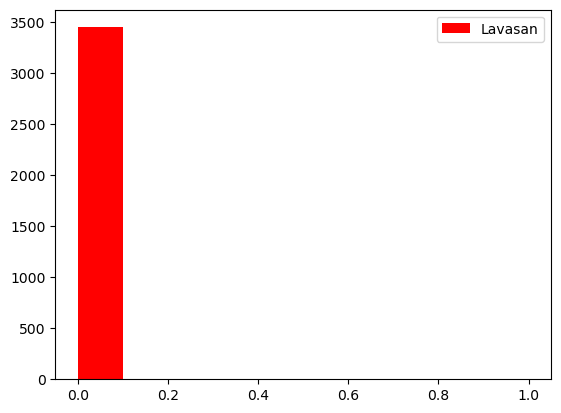

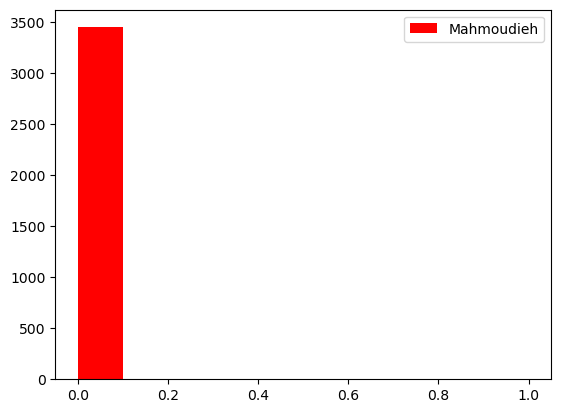

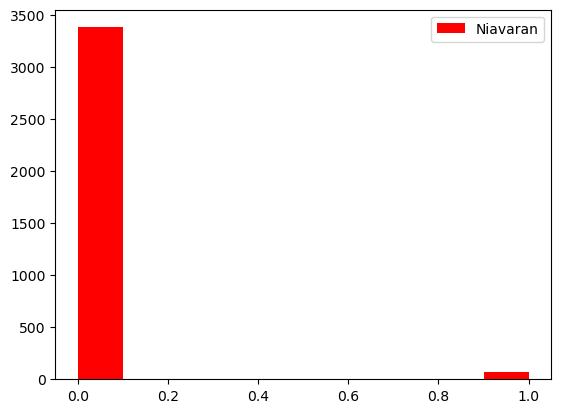

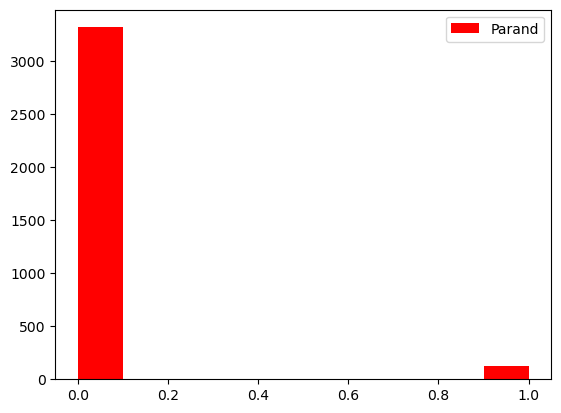

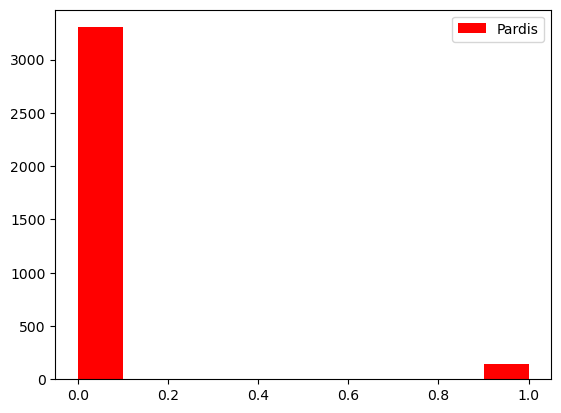

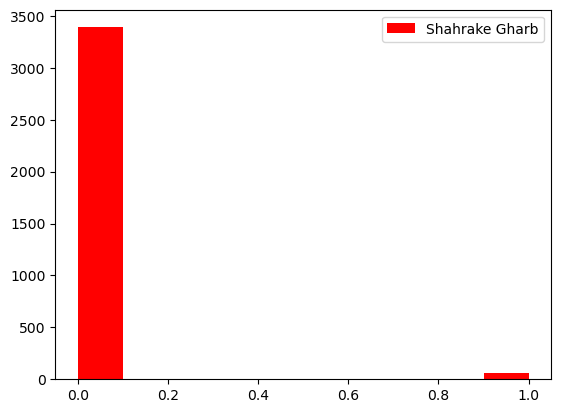

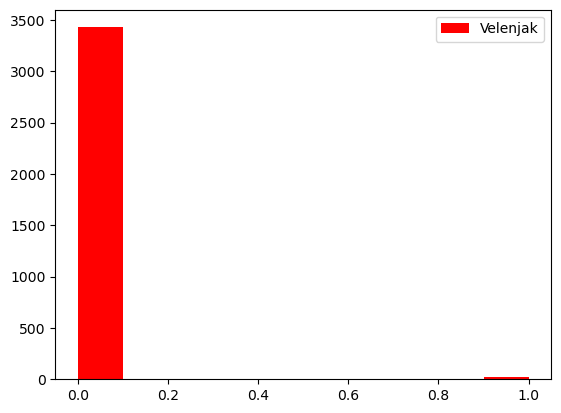

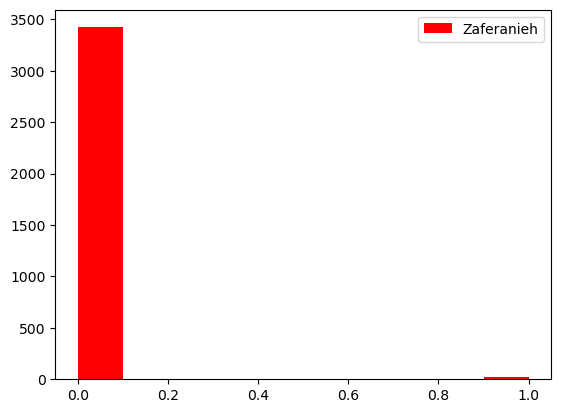

In [30]:
for i in df.drop(['Price','Price(USD)'],axis=1).columns:
    plt.hist(df[i],label=i,color='red')
    plt.legend()
    plt.show()

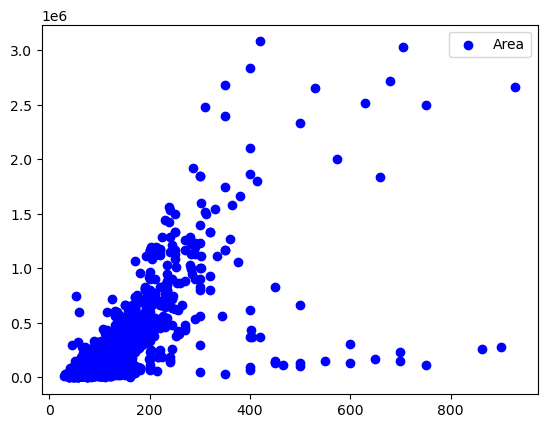

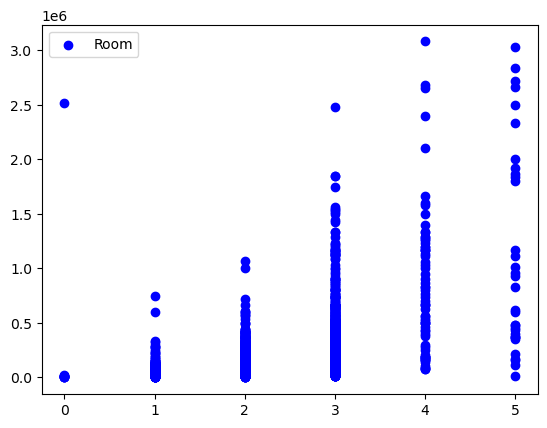

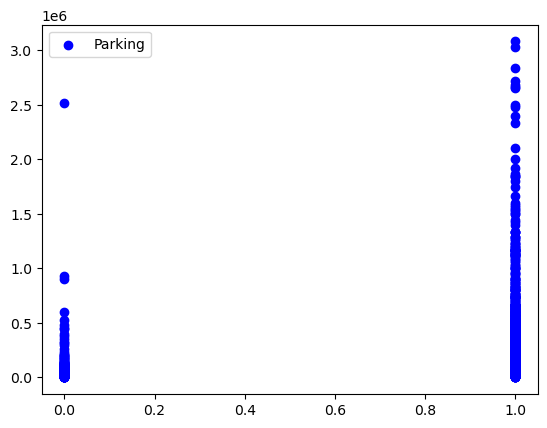

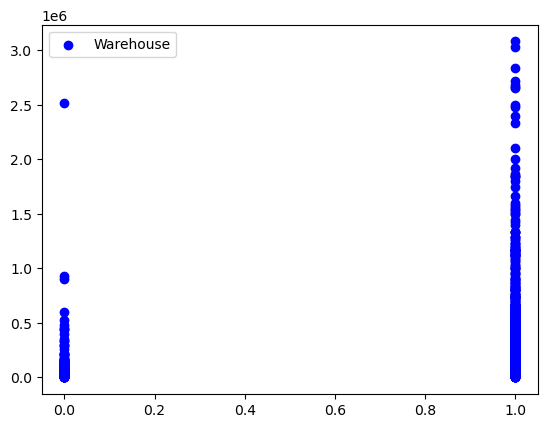

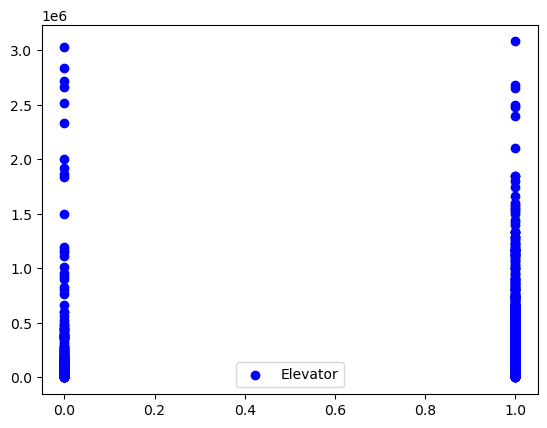

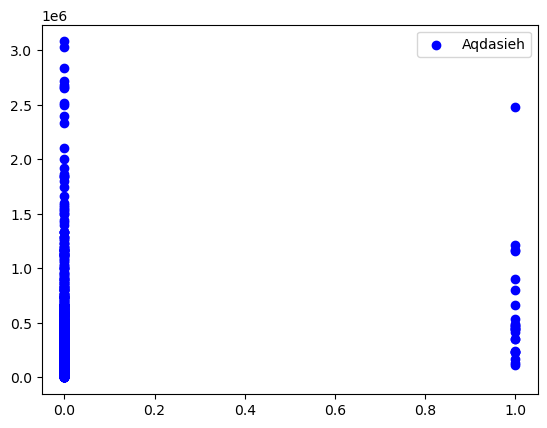

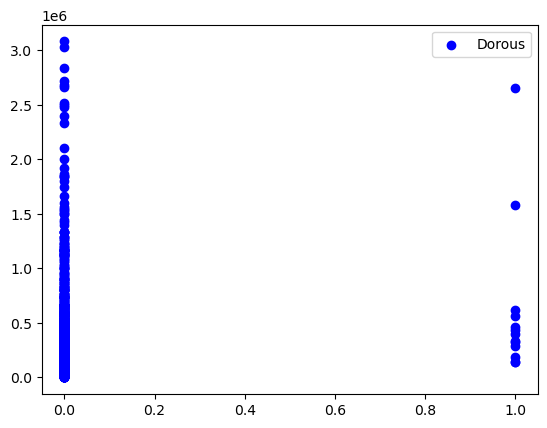

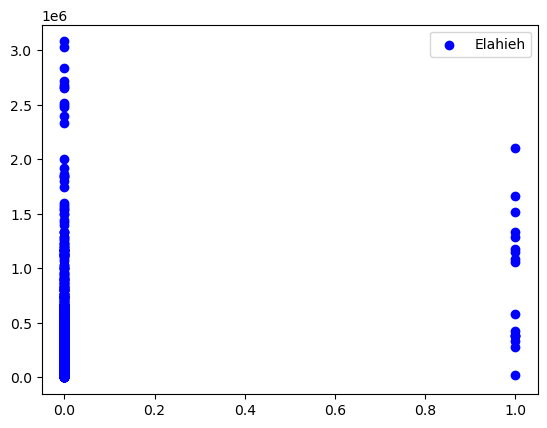

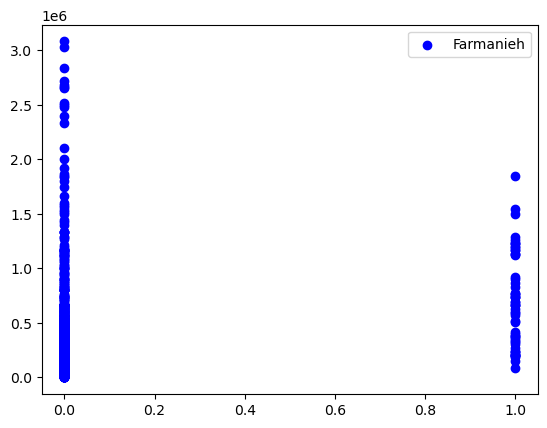

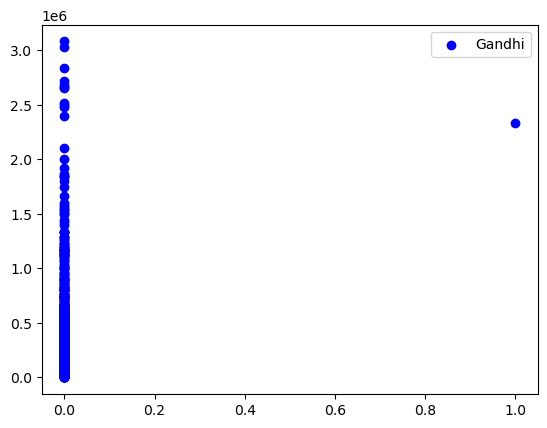

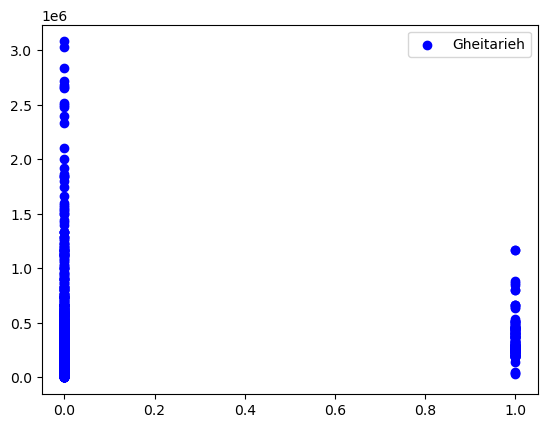

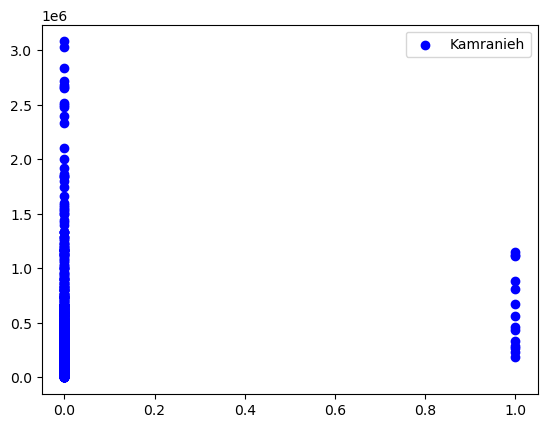

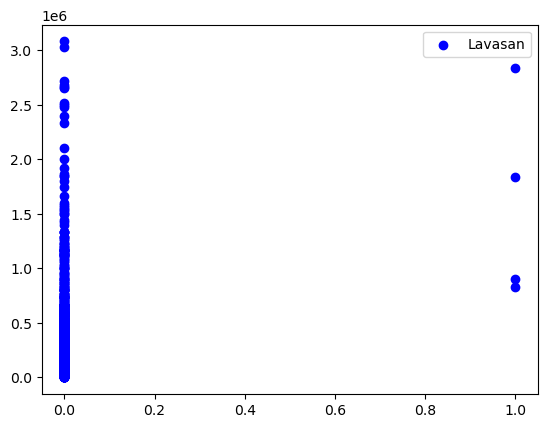

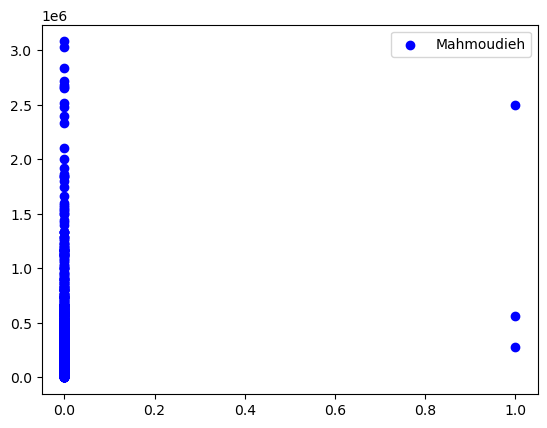

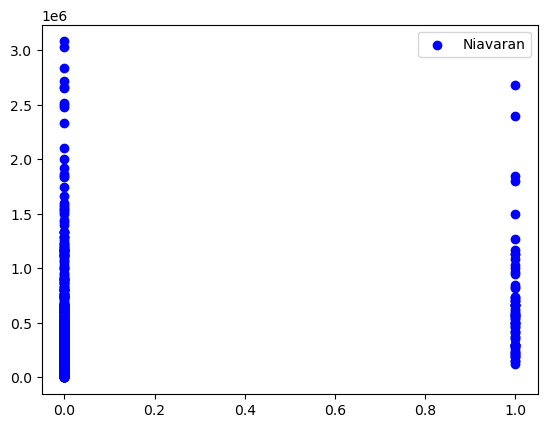

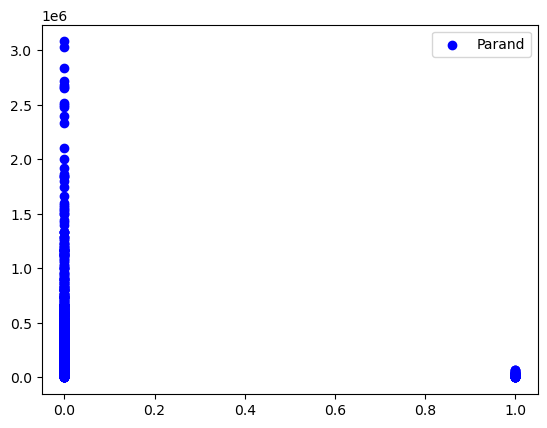

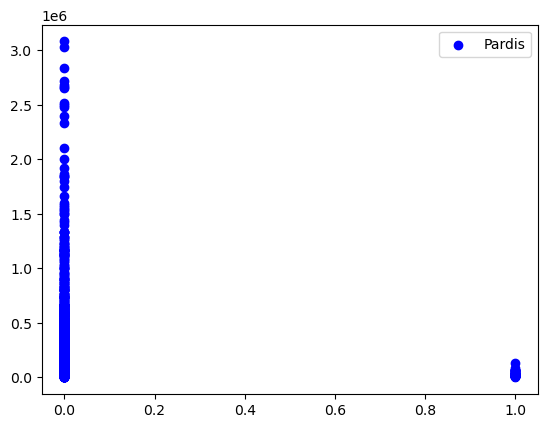

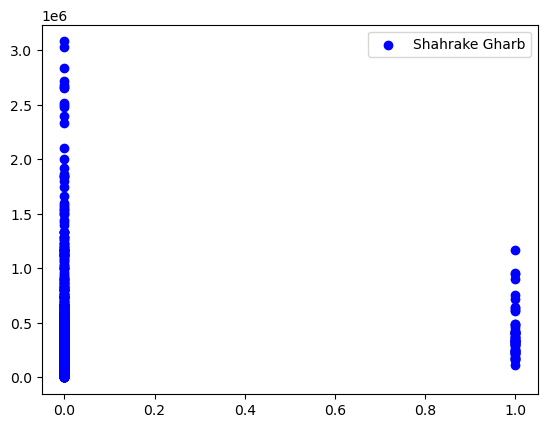

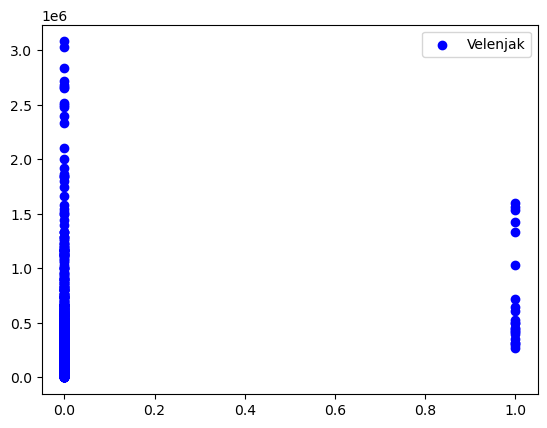

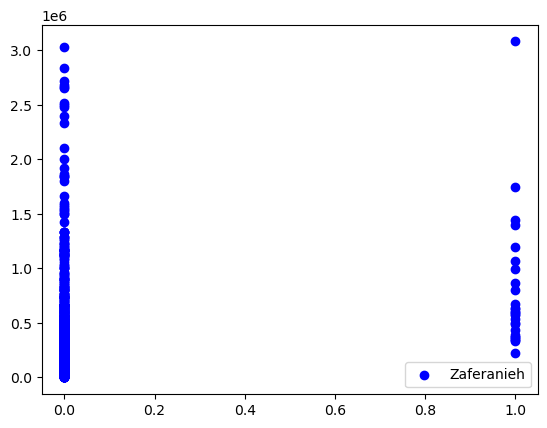

In [31]:
for i in df.drop(['Price','Price(USD)'],axis=1).columns:
    plt.scatter(df[i],df['Price(USD)'],label=i,color='blue')
    plt.legend()
    plt.show()

<div style="text-align: right">با توجه به نمودار ها و به خصوص نمودارهای مربوط به مساحت ساختمان می توان نتیجه گرفت ممکن است رگرسیون خطی باشد </div>

## Test and Train Data

In [32]:
from sklearn.model_selection import train_test_split
x=df.drop(['Price','Price(USD)'],axis=1)
y=df['Price(USD)']


In [33]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)


## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
regr =LinearRegression()

regr.fit (x_train, y_train)
 # The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [   1885.21830307   35568.9440728    -4817.39244766   11152.5868422
   22565.37033705  275814.51214297  300970.72997227  437788.29477369
  371091.5121931  1354882.87377018  113365.96589974  312589.1794611
  883799.2851283   572417.98245405  362222.14367364  -74684.57820634
 -107052.50059158  161063.22631457  335529.61171393  497537.74173012]


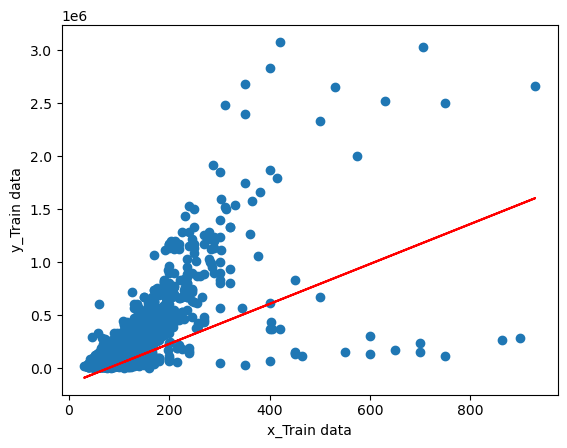

In [35]:

plt.scatter(x_train['Area'],y_train)
plt.plot(x_train['Area'],regr.coef_[0]*x_train['Area'] +  regr.intercept_, color='red')
plt.xlabel('x_Train data')
plt.ylabel('y_Train data')
plt.show()

<div style="text-align: right">نمودار تحلیل داده برای تحلیل رگرسیون  مطابق جزوه</div>

In [36]:

y_hat= regr.predict(x_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

print('Variance score: %.2f' % regr.score(x_test, y_test))


Residual sum of squares: 24435935241.48
Variance score: 0.67


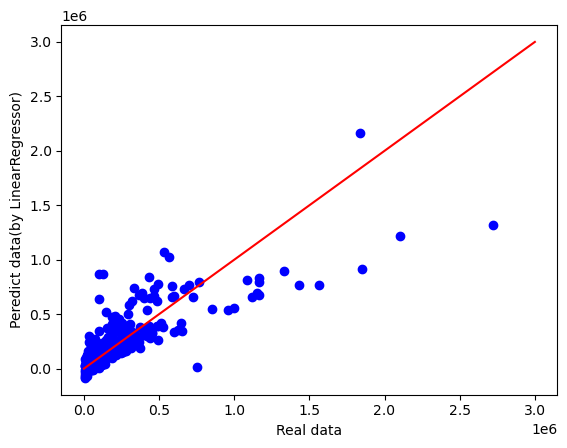

In [37]:

x,y=range(0,3*10**6),range(0,3*10**6)
plt.scatter(y_test,y_hat,color='blue')
plt.plot(x,y,color='red')
plt.xlabel('Real data')
plt.ylabel('Peredict data(by LinearRegressor)')
plt.show()

## RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(x_train,y_train)
y_hat= forest.predict(x_test)

In [39]:
forest.score(x_test,y_test)

0.7679385982646226

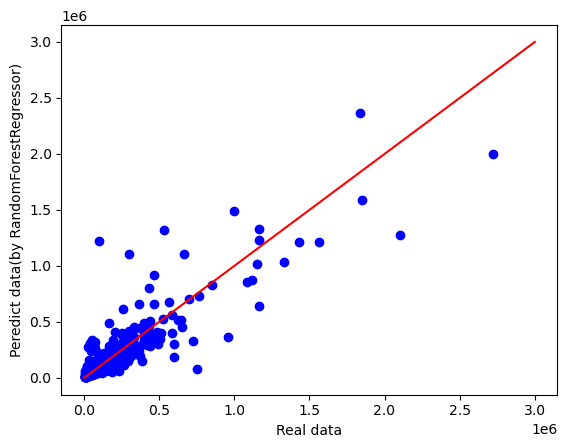

In [40]:

x,y=range(0,3*10**6),range(0,3*10**6)
plt.scatter(y_test,y_hat,color='blue')
plt.plot(x,y,color='red')
plt.xlabel('Real data')
plt.ylabel('Peredict data(by RandomForestRegressor)')
plt.show()

<div style="text-align: right">در اینجا دو نمونه نمودار رسم شده است که نمودار اول مطابق جزوه میباشد و خط رسم شده بر اساس رگرسیون را روی نمودار داده های ترین (تمرین) ما قرارر گرفته و نشاندهنده به نسبت درست بودن نه 100 درصد پیشبینی ماستولی نمودار ۲ و ۳ تحلیل بر داده های پیشبینی هست که هر چه به خط ایگرگ مساوی ایکس شوندیعنی پیشبینی ما دقیق تر بوده است و همچنین این دو نمودار جدای جزوه و خارج از ان می باشد</div>